In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
mobile = pd.read_csv('../data/MobileSensorReadings.csv')
static = pd.read_csv('../data/StaticSensorReadings.csv')




             Timestamp  Sensor-id   Value Units
0  2020-04-06 00:00:00         15  11.926   cpm
1  2020-04-06 00:00:00          6  14.816   cpm
2  2020-04-06 00:00:00          1  17.055   cpm
3  2020-04-06 00:00:00         12  16.787   cpm
4  2020-04-06 00:00:00         13  15.009   cpm
             Timestamp  Sensor-id       Long      Lat  Value Units  \
0  2020-04-06 00:00:00         15 -119.83035  0.14007    0.0   cpm   
1  2020-04-06 00:00:00         22 -119.76075  0.04205    0.0   cpm   
2  2020-04-06 00:00:00         40 -119.89067  0.11658    0.0   cpm   
3  2020-04-06 00:00:00          1 -119.96665  0.18792    0.0   cpm   
4  2020-04-06 00:00:00         27 -119.80570  0.01711    0.0   cpm   

             User-id  
0   CitizenScientist  
1                HSS  
2            MutantX  
3           MySensor  
4   CitizenScientist  


In [27]:
mobile.head()

,Timestamp,Sensor-id,Long,Lat,Value,Units,User-id
0,2020-04-06 00:00:00,15,-119.83035,0.14007,0.0,cpm,CitizenScientist
1,2020-04-06 00:00:00,22,-119.76075,0.04205,0.0,cpm,HSS
2,2020-04-06 00:00:00,40,-119.89067,0.11658,0.0,cpm,MutantX
3,2020-04-06 00:00:00,1,-119.96665,0.18792,0.0,cpm,MySensor
4,2020-04-06 00:00:00,27,-119.80570,0.01711,0.0,cpm,CitizenScientist


In [28]:
static.head()


,Timestamp,Sensor-id,Value,Units
0,2020-04-06 00:00:00,15,11.926,cpm
1,2020-04-06 00:00:00,6,14.816,cpm
2,2020-04-06 00:00:00,1,17.055,cpm
3,2020-04-06 00:00:00,12,16.787,cpm
4,2020-04-06 00:00:00,13,15.009,cpm


In [30]:
sns.set(color_codes=True)

print(set(mobile.Units))
print(set(static.Units))


mobile.columns

{' cpm'}
{' cpm'}


Index(['Timestamp', 'Sensor-id', 'Long', 'Lat', 'Value', 'Units', ' User-id'], dtype='object')

In [44]:
mobile_pre = mobile[mobile.Timestamp < '2020-04-07 23:59:00']
mobile_post = mobile[mobile.Timestamp > '2020-04-07 23:59:00']

mobile_pre.head()

mobile_post.head()


,Timestamp,Sensor-id,Long,Lat,Value,Units,User-id
1618368,2020-04-07 23:59:05,14,-119.841615,0.138802,13.00000,cpm,AS-3
1618369,2020-04-07 23:59:05,2,-119.967194,0.173895,31.09215,cpm,TestUnit
1618370,2020-04-07 23:59:05,5,-119.868881,0.190980,15.00000,cpm,CitizenScientist
1618371,2020-04-07 23:59:05,25,-119.820693,0.034545,27.00000,cpm,CitizenScientist
1618372,2020-04-07 23:59:05,13,-119.841759,0.145258,13.00000,cpm,HSS


In [45]:
print(mobile_pre.shape)
print(mobile_post.shape)
print(mobile.shape)

(1618320, 7)
(1697343, 7)
(3315711, 7)


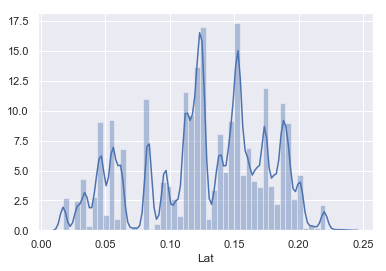

In [13]:
sns.distplot(mobile.Lat)


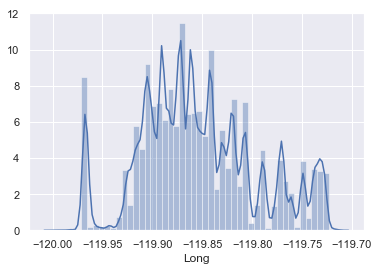

In [12]:
sns.distplot(mobile.Long)

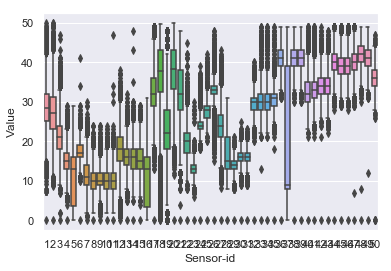

In [49]:
mobile_pre = mobile_pre[mobile_pre.Value < 50]

sns.boxplot(
    x = mobile_pre['Sensor-id'],
    y = mobile_pre.Value
)

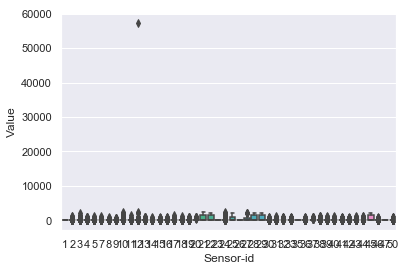

In [42]:
sns.boxplot(
    x = mobile_post['Sensor-id'],
    y = mobile_post.Value
)

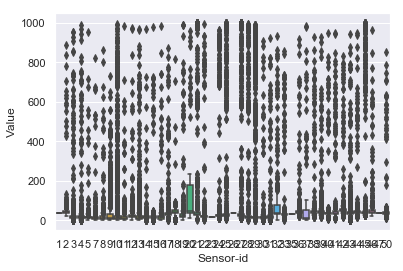

In [41]:
mobile_post_filtered = mobile_post[mobile_post.Value < 1000]

sns.boxplot(x = mobile_post_filtered['Sensor-id'], y = mobile_post_filtered['Value'])

In [51]:
mobile['LongBin'] = pd.cut(mobile.Long, bins = [-120, -119.95, -119.9, -119.85, -119.80, -119.75 ,-119.7])
mobile['LatBin'] = pd.cut(mobile.Lat, bins = [0, 0.05, 0.10, 0.15, 0.2, 0.25])

mobile.head()

,Timestamp,Sensor-id,Long,Lat,Value,Units,User-id,LongBin,LatBin
0,2020-04-06 00:00:00,15,-119.83035,0.14007,0.0,cpm,CitizenScientist,"(-119.85, -119.8]","(0.1, 0.15]"
1,2020-04-06 00:00:00,22,-119.76075,0.04205,0.0,cpm,HSS,"(-119.8, -119.75]","(0.0, 0.05]"
2,2020-04-06 00:00:00,40,-119.89067,0.11658,0.0,cpm,MutantX,"(-119.9, -119.85]","(0.1, 0.15]"
3,2020-04-06 00:00:00,1,-119.96665,0.18792,0.0,cpm,MySensor,"(-120.0, -119.95]","(0.15, 0.2]"
4,2020-04-06 00:00:00,27,-119.80570,0.01711,0.0,cpm,CitizenScientist,"(-119.85, -119.8]","(0.0, 0.05]"


In [52]:
mobile.groupby(['LongBin', 'LatBin']).head()

,Timestamp,Sensor-id,Long,Lat,Value,Units,User-id,LongBin,LatBin
0,2020-04-06 00:00:00,15,-119.830350,0.140070,0.0,cpm,CitizenScientist,"(-119.85, -119.8]","(0.1, 0.15]"
1,2020-04-06 00:00:00,22,-119.760750,0.042050,0.0,cpm,HSS,"(-119.8, -119.75]","(0.0, 0.05]"
2,2020-04-06 00:00:00,40,-119.890670,0.116580,0.0,cpm,MutantX,"(-119.9, -119.85]","(0.1, 0.15]"
3,2020-04-06 00:00:00,1,-119.966650,0.187920,0.0,cpm,MySensor,"(-120.0, -119.95]","(0.15, 0.2]"
4,2020-04-06 00:00:00,27,-119.805700,0.017110,0.0,cpm,CitizenScientist,"(-119.85, -119.8]","(0.0, 0.05]"
5,2020-04-06 00:00:00,30,-119.732330,0.082940,0.0,cpm,PeterLovesCrystals54,"(-119.75, -119.7]","(0.05, 0.1]"
6,2020-04-06 00:00:00,8,-119.825710,0.198070,0.0,cpm,MySensor,"(-119.85, -119.8]","(0.15, 0.2]"
7,2020-04-06 00:00:00,41,-119.883420,0.121800,0.0,cpm,CitizenScientist,"(-119.9, -119.85]","(0.1, 0.15]"
8,2020-04-06 00:00:00,9,-119.876170,0.180960,0.0,cpm,MySensor,"(-119.9, -119.85]","(0.15, 0.2]"
9,2020-04-06 00:00:00,37,-119.896760,0.153410,0.0,cpm,Bob,"(-119.9, -119.85]","(0.15, 0.2]"


c:\users\j.etcheberry.mason\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


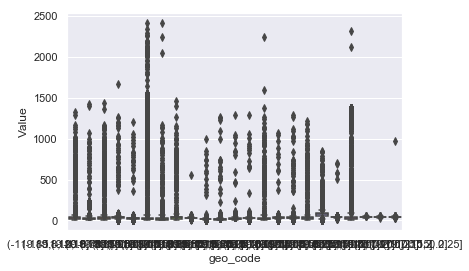

In [59]:
mobile_grp = mobile[mobile.Value < 5000]
mobile_grp['geo_code'] = mobile_grp.LongBin.astype(str) + ' ' + mobile_grp.LatBin.astype(str)


sns.boxplot(x = mobile_grp['geo_code'], y = mobile_grp['Value'])

In [62]:
mobile.groupby(['LongBin', 'LatBin']).agg({'Value': ['mean', 'median','std', 'min', 'max', 'count']})

Value                                    \
                                     mean     median         std        min   
LongBin           LatBin                                                      
(-120.0, -119.95] (0.1, 0.15]   38.437245  37.845494   10.693943  21.500333   
                  (0.15, 0.2]   36.370871  36.372000   15.198304   0.000000   
(-119.95, -119.9] (0.05, 0.1]   16.893090  16.019988   11.031132   0.000000   
                  (0.1, 0.15]   32.367590  33.000000   17.431139   0.000000   
                  (0.15, 0.2]   22.528437  20.822638   19.011295   0.000000   
(-119.9, -119.85] (0.05, 0.1]   34.078051  35.000000    3.854421   0.000000   
                  (0.1, 0.15]   29.222446  31.000000   16.964500   0.000000   
                  (0.15, 0.2]   30.970749  37.000000   17.286452   0.000000   
                  (0.2, 0.25]   14.878844  13.000000   12.971251   0.000000   
(-119.85, -119.8] (0.0, 0.05]   25.278151  25.200570   11.771328   0.000000   
                  (0.05, 0.1]   32.314627  31.079413   12.670386   0.000000   
                  (0.1, 0.15]   28.775765  26.000000   20.106874   0.000000   
                  (0.15, 0.2]   21.580493  16.000000  142.182130   0.000000   
                  (0.2, 0.25]  176.341738  24.478215  406.201002   0.000000   
(-119.8, -119.75] (0.0, 0.05]   34.891907  19.000000   47.839633   0.000000   
                  (0.05, 0.1]   32.998127  32.000000   10.739848   0.000000   
                  (0.1, 0.15]   29.058644  29.000000   14.526088   0.000000   
                  (0.15, 0.2]   83.757650  77.766864   89.547177   0.000000   
(-119.75, -119.7] (0.0, 0.05]   20.402114  15.000000   13.514442   0.000000   
                  (0.05, 0.1]  336.684344  17.000000  599.814453   0.000000   
                  (0.1, 0.15]   41.393969  41.000000    2.964483  33.000000   
                  (0.15, 0.2]   41.748466  42.000000    3.190012  33.000000   
                  (0.2, 0.25]   42.998395  42.000000   31.297188  32.000000   

                                                     
                                        max   count  
LongBin           LatBin                             
(-120.0, -119.95] (0.1, 0.15]    702.382534   17059  
                  (0.15, 0.2]   1673.366900  158861  
(-119.95, -119.9] (0.05, 0.1]   1002.266890   55230  
                  (0.1, 0.15]   1219.604552  219621  
                  (0.15, 0.2]   2244.825660  267243  
(-119.9, -119.85] (0.05, 0.1]    556.872898   71531  
                  (0.1, 0.15]   1437.430593  520749  
                  (0.15, 0.2]   1460.370177  490587  
                  (0.2, 0.25]   1263.780780   93346  
(-119.85, -119.8] (0.0, 0.05]   1206.915158  118720  
                  (0.05, 0.1]   1293.722938  141084  
                  (0.1, 0.15]   1329.324387  386277  
                  (0.15, 0.2]  57345.200301  166049  
                  (0.2, 0.25]   2320.767021   16480  
(-119.8, -119.75] (0.0, 0.05]   1422.778052  100611  
                  (0.05, 0.1]   1069.688518  116074  
                  (0.1, 0.15]   1284.614654   73267  
                  (0.15, 0.2]    844.015337   27897  
(-119.75, -119.7] (0.0, 0.05]   1288.370370   98019  
                  (0.05, 0.1]   2418.093389  174105  
                  (0.1, 0.15]     51.000000    1028  
                  (0.15, 0.2]     58.000000     978  
                  (0.2, 0.25]    972.563606     895